## Linear Regression

$$ y = w_0x_0 + w_1x_1 + ... + w_mx_m = \sum_{j=0}^{m} w^Tx$$

### Closed form solution
$$ w= (X^TX)^-1X^Ty $$

#### Import dependencies

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

#### Random data for toy problem

In [2]:
a= np.random.normal(0,1,2000).reshape(2000,1)
b = np.ones((2000,2))

for i in range(2000):
    b[i][0] = a[i]
    b[i][1] = a[i]*2  + np.random.normal()


In [3]:
df = pandas.DataFrame(b, columns = ['X','Y'])
df

,X,Y
0,0.895157,2.187519
1,-0.521715,0.222327
2,-0.992129,-2.193487
3,-0.952527,-2.045466
4,0.008696,1.254215
...,...,...
1995,-0.272892,-0.035797
1996,0.369455,-0.081398
1997,0.762603,2.268410
1998,0.415635,-0.299378


#### Normalize X data

In [4]:
yield_column = df.loc[:, df.columns == 'Y'] 
del df['Y']
normalized_df = (df-df.mean())/df.std()
normalized_df = pandas.merge(normalized_df, yield_column, left_index=True, right_index=True)
normalized_df

,X,Y
0,0.933705,2.187519
1,-0.521486,0.222327
2,-1.004623,-2.193487
3,-0.963950,-2.045466
4,0.023269,1.254215
...,...,...
1995,-0.265934,-0.035797
1996,0.393785,-0.081398
1997,0.797566,2.268410
1998,0.441214,-0.299378


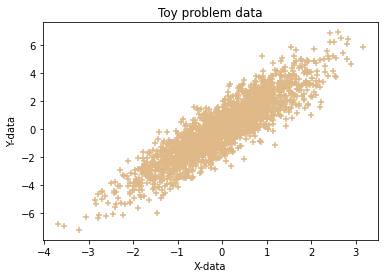

In [11]:
plt.scatter('X','Y',data =normalized_df, marker = '+', color = 'burlywood')
plt.ylabel('Y-data')
plt.xlabel('X-data')
plt.title('Toy problem data')
plt.show()

In [6]:
def mse(y_pred,y_test):
    '''Returns the mean squared error given two numpy arrays'''
    sum_squared_error = np.sum(np.square(y_test - y_pred))
    m_s_e = sum_squared_error/len(y_pred)
    return m_s_e


def linear_regression_fit(x_train,y_train):
    '''Returns the closed from w parameter given the x and y data'''
    
    x_dash_train = np.transpose(x_train)
    w = np.linalg.inv(x_dash_train @ x_train) @ x_dash_train @ y_train 
    return w

def linear_regression_predict(x_test,w_star):
    '''Returns the predictions given some test data and wstar'''
    y_pred=  x_test @ w_star
    
    return y_pred


In [7]:
# Split the data into 60%-40% for train/test
split = int(len(df)*0.6)
data = np.array(normalized_df)
np.random.seed(0)
shuffle = np.random.permutation(len(data))


In [8]:
x_linear= np.ones((len(data),1))
y_linear= np.ones((len(data),1))

for i in range(len(data)):
    x_linear[i] = data[i][0]
    y_linear[i] = data[i][-1]
    
x_linear = x_linear[shuffle]
y_linear = y_linear[shuffle]
x_train_linear= x_linear[:split]
y_train_linear = y_linear[:split]

x_test_linear = x_linear[split:]
y_test_linear = y_linear[split:]

In [9]:
w_star = linear_regression_fit(x_train_linear,y_train_linear)
y_pred_linear = linear_regression_predict(x_test_linear,w_star)
print("The mean squared error for the Linear Regression toy problem is {}".format(mse(y_pred_linear,y_test_linear)))

The mean squared error for the Linear Regression toy problem is 0.9113508868178015


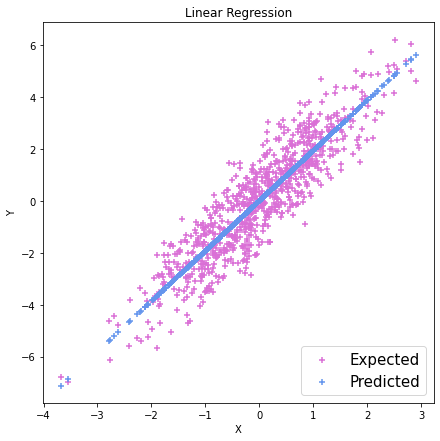

In [10]:
plt.figure(figsize=(7,7))
plt.scatter(x_test_linear,y_test_linear,color = 'orchid',marker = '+')
plt.scatter(x_test_linear,y_pred_linear,color = 'cornflowerblue',marker = '+')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend(["Expected", "Predicted"], loc ="lower right",prop={'size': 15} )
plt.show()